In [1]:
# importing modules and relevant data set

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # Visualization
import seaborn as sns
import os

# configurations
pd.set_option('display.max_rows', 200) 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("whitegrid")

df = pd.read_excel(open('processed_data.xlsx', 'rb'),sheet_name='complete_auctions')
auctions_df = pd.read_excel(open('processed_data.xlsx', 'rb'),sheet_name='individual_auctions')

##### Taking a look at total unique values in each attribute

In [2]:
df.nunique()

auctionid              628
bid                   1858
bidtime              10400
bidder                3387
bidderrate             301
openbid                109
price                 1283
item                     3
auction_type             3
price_increment       1096
bidtime_increment     7063
dtype: int64

#### Overview of auctions dataset

In [3]:
auctions_df.head()

,auctionid,total_bids,total_bidder,opening_price,closing_price,won_bidder,type,item,total_profit,profit_rate,profit_rate_log
0,1638843936,7,5,500.0,1625.0,carloss8055,7 day auction,Cartier wristwatch,1125.0,3.250000,1.178655
1,1638844284,2,2,200.0,500.0,njbirdmom,7 day auction,Cartier wristwatch,300.0,2.500000,0.916291
2,1638844464,16,5,300.0,740.0,adammurry,7 day auction,Cartier wristwatch,440.0,2.466667,0.902868
3,1638844729,11,2,225.0,320.0,sylvesterii,7 day auction,Cartier wristwatch,95.0,1.422222,0.352221
4,1638893549,5,4,99.0,177.5,eli.flint@flightsafety.co,3 day auction,Cartier wristwatch,78.5,1.792929,0.583851


##### More insight is obtained by sectioning into different auction types and item to see the individual performances of different types of items in different types of auction

In [4]:
auctions_df.columns

Index(['auctionid', 'total_bids', 'total_bidder', 'opening_price',
       'closing_price', 'won_bidder', 'type', 'item', 'total_profit',
       'profit_rate', 'profit_rate_log'],
      dtype='object')

In [5]:
auctions_visualize = auctions_df.groupby(['type', 'item'])[['total_bids', 'opening_price', 
                                                                    'closing_price', 'total_profit', 'profit_rate']].mean()
auctions_visualize

total_bids  opening_price  closing_price  \
type          item                                                            
3 day auction Cartier wristwatch    13.888889     189.719444     630.856667   
              Palm Pilot M515 PDA   12.800000     113.110000     223.085895   
              Xbox game console     15.914286      43.008857     118.426571   
5 day auction Cartier wristwatch    16.904762     309.283333     864.079048   
              Palm Pilot M515 PDA   16.092593      98.481296     229.873148   
              Xbox game console     18.714286      46.905238     139.052381   
7 day auction Cartier wristwatch    13.896907     272.215670     936.069278   
              Palm Pilot M515 PDA   19.752577      53.771368     230.599794   
              Xbox game console     20.010753      36.217419     134.576989   

                                   total_profit  profit_rate  
type          item                                            
3 day auction Cartier wristwatch     441.137222    23.440728  
              Palm Pilot M515 PDA    109.975895  2201.728307  
              Xbox game console       75.417714  1007.615724  
5 day auction Cartier wristwatch     554.795714   249.337185  
              Palm Pilot M515 PDA    131.391852  1449.886967  
              Xbox game console       92.147143  1041.018586  
7 day auction Cartier wristwatch     663.853608  2279.584038  
              Palm Pilot M515 PDA    176.828426  5752.459696  
              Xbox game console       98.359570  1228.843742

### Charting specific statistic counts for each auction type (3day, 5day, 7day)

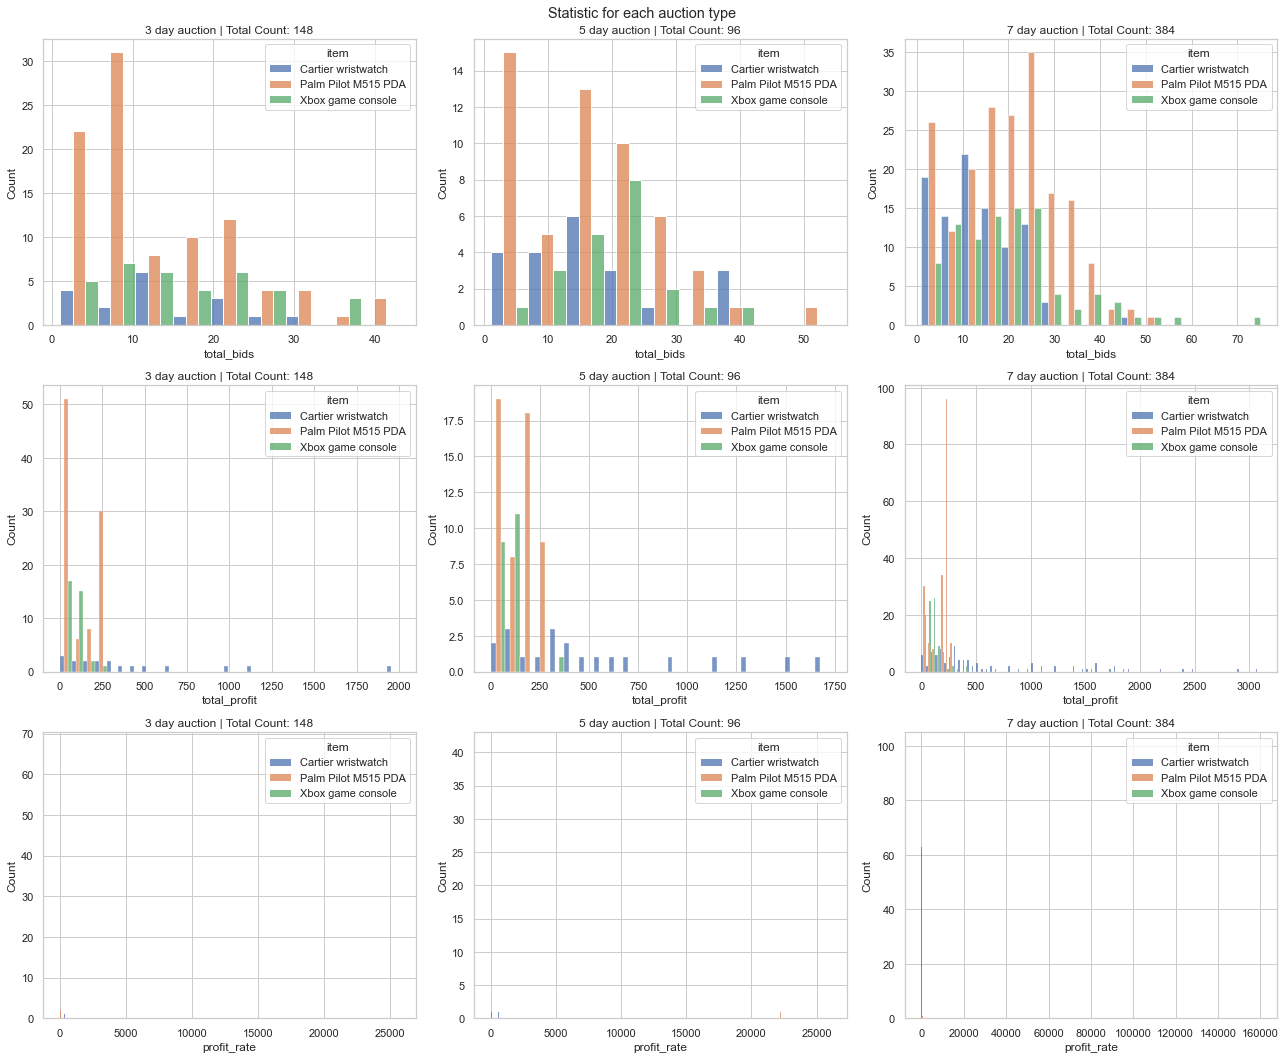

In [91]:
f, ax = plt.subplots(3, 3, figsize=(18, 15))

def chart_auctions(auction_type_input, select_value, axes_input):
    sns.histplot(
        data = auctions_df[auctions_df.type == auction_type_input],
        x = select_value,
        hue = 'item',
        multiple = 'dodge',
        ax = axes_input
    )
    axes_input.set_title(auction_type_input + ' | Total Count: ' + str(auctions_df[auctions_df.type == auction_type_input].shape[0]))
    axes_input.set_label('test')
    
chart_auctions('3 day auction', 'total_bids', ax[0, 0])
chart_auctions('5 day auction', 'total_bids', ax[0, 1])
chart_auctions('7 day auction', 'total_bids', ax[0, 2])
chart_auctions('3 day auction', 'total_profit', ax[1, 0])
chart_auctions('5 day auction', 'total_profit', ax[1, 1])
chart_auctions('7 day auction', 'total_profit', ax[1, 2])
chart_auctions('3 day auction', 'profit_rate', ax[2, 0])
chart_auctions('5 day auction', 'profit_rate', ax[2, 1])
chart_auctions('7 day auction', 'profit_rate', ax[2, 2])

f.suptitle('Statistic for each auction type')
f.tight_layout()

###### Findings:
- Palm Pilot is the most popular product
- Palm Pilot performs significantly better in 7 day auctions (May be misleading due to listing at 0.01, inflated by quantity which provides the illusion of better returns)

### Charting relational plot of profit rate to bid count

In [7]:
auctions_df

,auctionid,total_bids,total_bidder,opening_price,closing_price,won_bidder,type,item,total_profit,profit_rate,profit_rate_log
0,1638843936,7,5,500.00,1625.00,carloss8055,7 day auction,Cartier wristwatch,1125.00,3.250000,1.178655
1,1638844284,2,2,200.00,500.00,njbirdmom,7 day auction,Cartier wristwatch,300.00,2.500000,0.916291
2,1638844464,16,5,300.00,740.00,adammurry,7 day auction,Cartier wristwatch,440.00,2.466667,0.902868
3,1638844729,11,2,225.00,320.00,sylvesterii,7 day auction,Cartier wristwatch,95.00,1.422222,0.352221
4,1638893549,5,4,99.00,177.50,eli.flint@flightsafety.co,3 day auction,Cartier wristwatch,78.50,1.792929,0.583851
...,...,...,...,...,...,...,...,...,...,...,...
623,8215558653,14,9,55.00,135.29,wattscrew1,3 day auction,Xbox game console,80.29,2.459818,0.900087
624,8215571039,20,4,50.00,150.00,lambonius1,3 day auction,Xbox game console,100.00,3.000000,1.098612
625,8215582227,16,7,60.00,152.50,ultimatum_man,3 day auction,Xbox game console,92.50,2.541667,0.932820
626,8215605488,11,10,0.99,61.00,pgauctions,3 day auction,Xbox game console,60.01,61.616162,4.120924


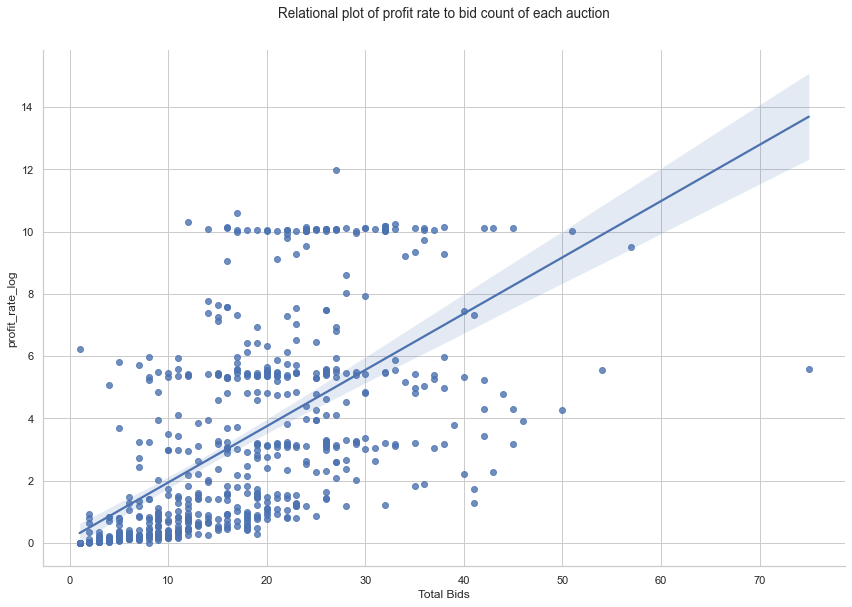

In [8]:
g = sns.lmplot(
    data = auctions_df,
    y = 'profit_rate_log',
    x = 'total_bids',
    height = 8,
    aspect = 1.5
)

#formatting
plt.title('Relational plot of profit rate to bid count of each auction', fontsize= 13.5, y=1.05)
plt.xlabel('Total Bids', fontsize = 12)
plt.show()

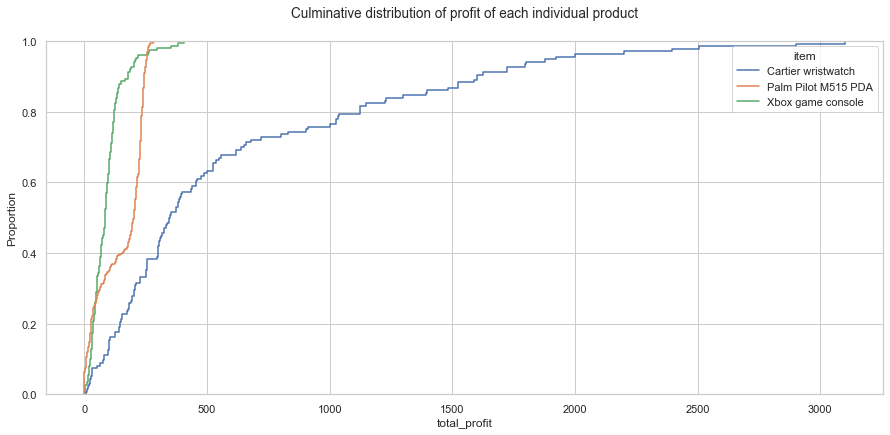

In [9]:
sns.set(rc={'figure.figsize':(15,6.5)})
sns.set_style("whitegrid")
g = sns.ecdfplot(
    data = auctions_df,
    hue = 'item',
    x = 'total_profit'
)

#formatting
g.set_title('Culminative distribution of profit of each individual product', y=1.05, fontsize = 13.5)
plt.show()

###### Findings:
- Cartier wristwatch has the most profit potential

###### TODO: 
- Time trend for different types of auctions to figure out if there is a trend of a 'spike' nearing the end of auctions

### Plotting price trend of auctions

In [2]:
#join df and auction_df to connect auctions to closing price
merged_df = df.merge(auctions_df, left_on='auctionid', right_on='auctionid').iloc[:,:15].copy()

In [3]:
def convert(x):
    if x == '3 day auction': return 3
    elif x == '5 day auction': return 5
    elif x == '7 day auction': return 7

merged_df['rel_price'] = merged_df.price / merged_df.closing_price
merged_df['auc'] = merged_df.auction_type.apply(convert)
merged_df['rel_time'] = merged_df.bidtime / merged_df.auc

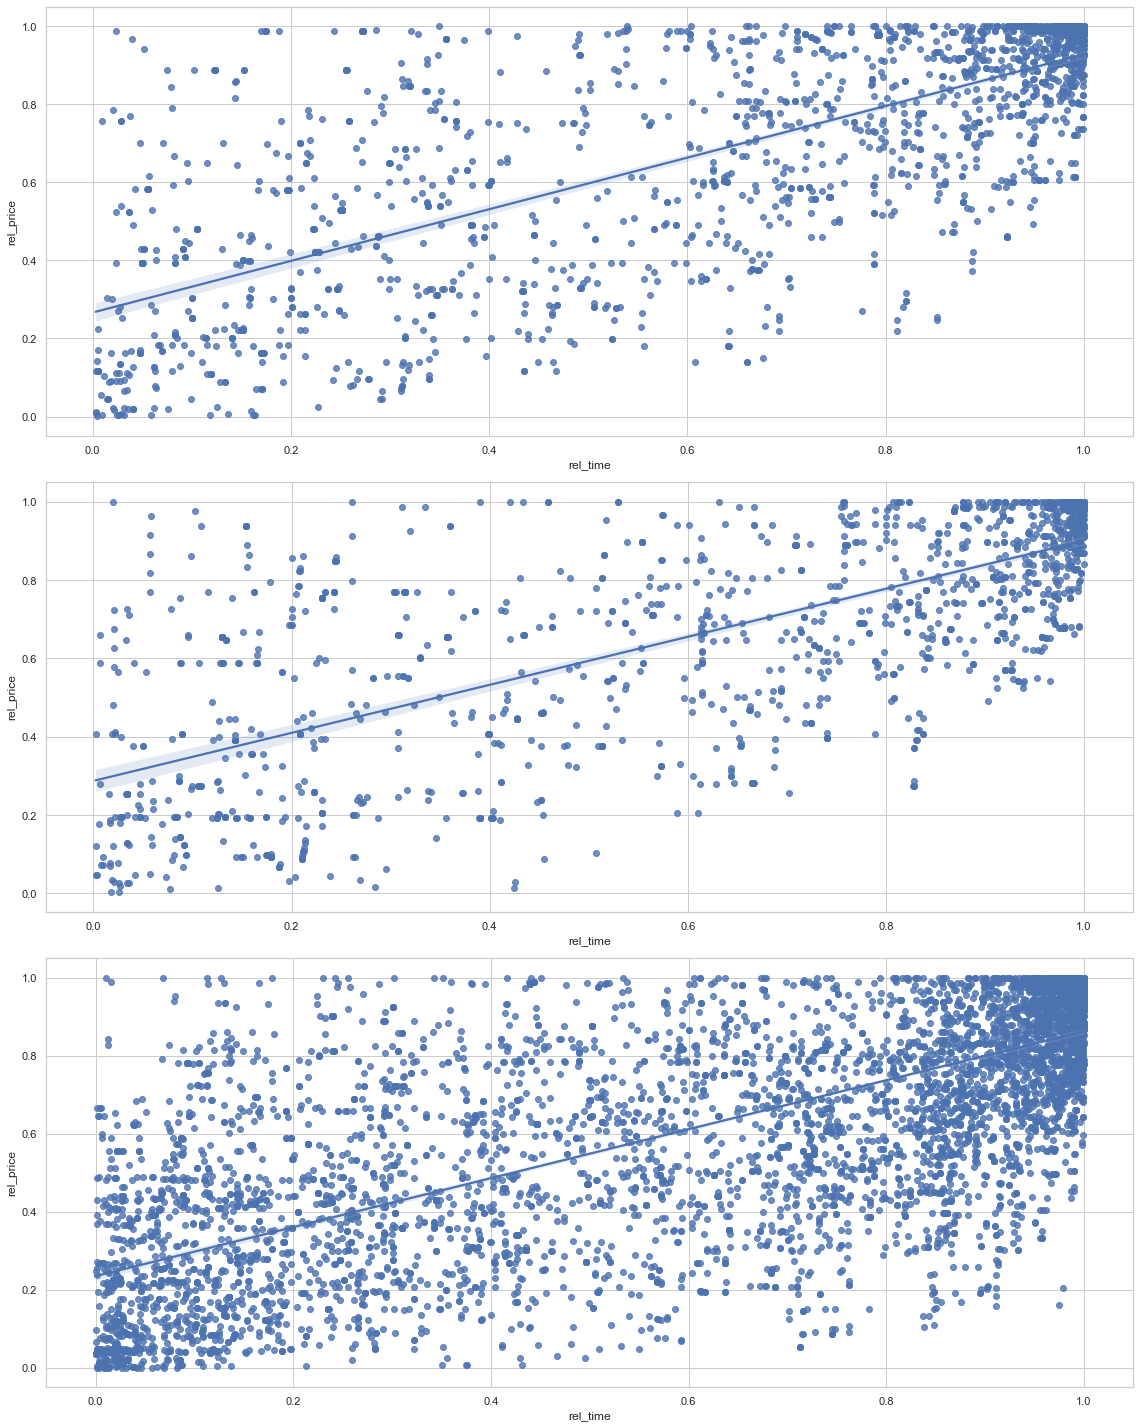

In [4]:
f, ax = plt.subplots(3, 1,figsize=(16,20))

sns.regplot(
    data=merged_df[merged_df.auction_type == '3 day auction'],
    x='rel_time',
    y='rel_price',
#     hue='auctionid',
    ax=ax[0]
)

sns.regplot(
    data=merged_df[merged_df.auction_type == '5 day auction'],
    x='rel_time',
    y='rel_price',
#     hue='auctionid',
    ax=ax[1]
)

sns.regplot(
    data=merged_df[merged_df.auction_type == '7 day auction'],
    x='rel_time',
    y='rel_price',
#     hue='auctionid',
    ax=ax[2]
)

f.tight_layout()

<AxesSubplot:xlabel='rel_time', ylabel='rel_price'>

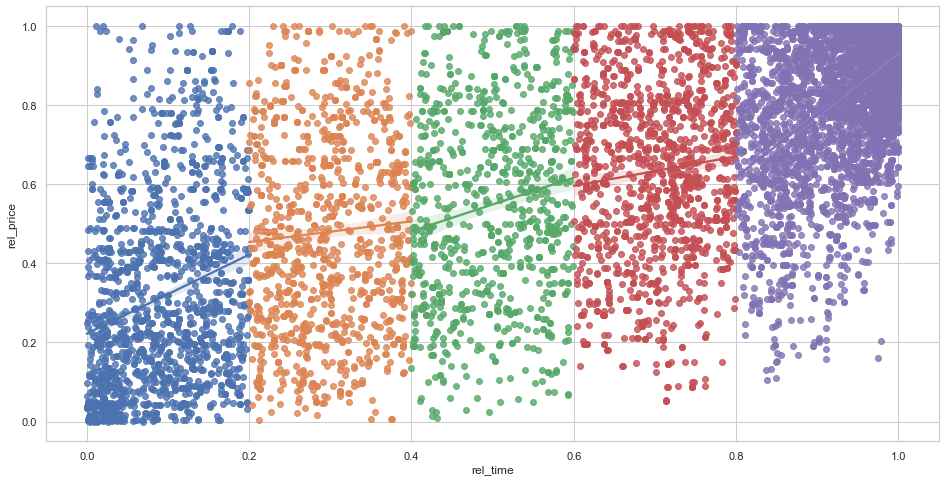

In [23]:
f, ax = plt.subplots(1, 1,figsize=(16,8))

sns.regplot(
    data=merged_df[merged_df.rel_time < 0.20],
    x='rel_time',
    y='rel_price',
    ax=ax
)
sns.regplot(
    data=merged_df[(merged_df.rel_time > 0.20) & (merged_df.rel_time < 0.40)],
    x='rel_time',
    y='rel_price',
    ax=ax
)
sns.regplot(
    data=merged_df[(merged_df.rel_time > 0.40) & (merged_df.rel_time < 0.60)],
    x='rel_time',
    y='rel_price',
    ax=ax
)
sns.regplot(
    data=merged_df[(merged_df.rel_time > 0.60) & (merged_df.rel_time < 0.80)],
    x='rel_time',
    y='rel_price',
    ax=ax
)
sns.regplot(
    data=merged_df[merged_df.rel_time > 0.80],
    x='rel_time',
    y='rel_price',
    ax=ax
)